# Phase 4 - Outliers detection and normalization
*TEAM 5*

In [166]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
from scipy.stats import zscore


In [47]:
movies = pd.read_csv('../data/us.movies.actors.tsv', sep='\t', na_values=['\\N'])
print(f'{movies.shape=}')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (17,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


movies.shape=(9538110, 23)


In [48]:
movies.head()

,tconst,nconst,primaryName,birthYear,deathYear,primaryProfession,titleType,primaryTitle,originalTitle,isAdult,...,genres,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes
0,tt0000574,nm0143899,Godfrey Cass,1866.0,1951.0,actor,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,...,Action,6,The Story of the Kelly Gang,US,NaN,imdbDisplay,NaN,0,6.1,735
1,tt0000574,nm0143899,Godfrey Cass,1866.0,1951.0,actor,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,...,Adventure,6,The Story of the Kelly Gang,US,NaN,imdbDisplay,NaN,0,6.1,735
2,tt0000574,nm0143899,Godfrey Cass,1866.0,1951.0,actor,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,...,Biography,6,The Story of the Kelly Gang,US,NaN,imdbDisplay,NaN,0,6.1,735
3,tt0000574,nm0170118,Bella Cola,NaN,NaN,actress,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,...,Action,6,The Story of the Kelly Gang,US,NaN,imdbDisplay,NaN,0,6.1,735
4,tt0000574,nm0170118,Bella Cola,NaN,NaN,actress,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,...,Adventure,6,The Story of the Kelly Gang,US,NaN,imdbDisplay,NaN,0,6.1,735


## Treating attribute missing and invalid values

Summary of the work done in the Python cells below:

- `tconst`: checking missing values and invalid format of the id, there isn't any of those. However, the attribute has almost only distinct values and should be deleted if during the data mining application.
- `nconst`: checking missing values and invalid format of the id, there isn't any of those. However, as for the previous attribute nconst has a lot of distinct values. It should be removed when data mining is applied.
- `primaryName`: checking missing values, there isn't any. As for the previous two, a lot a distinct values.
- `birthYear`: the missing value rate is above 73% which makes this attribute useless for the learning. 
- `deathYear`: as previously, the missing value rate is high (above 90%). It is understandable as all the actors aren't dead but it still makes this attribute hard to use and he may be irrelevant for the learning algorithm to keep this information.  
- `primaryProfession`: no missing or invalid values in this attribute.
- `titleType`: there aren't any invalid or missing entries for this attribute. There is a strong class imbalance which may lead to the suppression of this attribute but the information given may worth to keep it for now.
- `primaryTitle`: no invalid or missing values but lot of distinct values and 81% of similarity with originalTitle.
- `originalTitle`: no invalid or missing values but lot of distinct values and 81% of similarity with primaryTitle.
- `isAdult`: no invalid or missing entries but a strong class imbalance. However, the given information may be considered by the miner depending on his study.
- `startYear`: No invalid attributes as the range is coherent (1906-2021). 7 movies with missing startYear. They can be deleted regarding the size of the dataset if the purpose is to apply data mining methods. 
- `endYear`: all the values are missing for this attribute. It must be deleted as it doesn't bring any information.
- `runtimeMinutes`: there are some missing values and the value-range is too wide. As this variable may be very important for the analysis, it would be interesting to substitute its missing or invalid values. We identify outliers by computing the z-score. The entries with a too high z-score are omitted (z>10). Using z-score assumes normal distribution of the variable. We can validate this hypothesis afterward with the ditribution plot. These omitted values represent less than 2% of the entries which isn't a big ratio. We replace these values with the median as this replacement method is less sensitive to the distribution and the remaining extreme values.
- `genres`: there are 2094 movies with missing genres. It represents less than 0.2% of the dataset. There isn't any simple way of giving a genre so we would prefer to remove these values. All the other entries are valid.
- `ordering`: by looking at the distribution not any sample seems to be an outlier. There aren't any missing entries for this attribute.
- `title`: no invalid or missing values but lot of distinct values. This attribute has a lot of similarity with primaryTitle and originalTitle. 
- `region`: only one distinct value and there isn't any missing entries. This entry don't bring any information. 
- `language`: with more than 98% of missing entries, this attribute can't be used.
- `types`: there are around 16% or entries missing for this attribute. There is a strong class imbalance in this attribute so it may be possible to replace by the mode. As it adds bias to the dataset, it can be unappropriate to replace these values, we assume that the purpose of the further study won't be mainly focused on the types attribute. 
- `attributes`: with more than 88% percent of missing values, no information can be extracted for data mining purpose. 
- `averageRating`: values of the attribute are in the right range [0-10]. With no missing values.
- `numVotes`: the range of the attribute seems correct (only positive values and the one with the most votes are popular). No missing values.

### `tconst`

In [49]:
print(f'{movies.tconst.nunique()=}')
print(f'{movies.tconst.isna().sum()=}')

movies.tconst.nunique()=145030
movies.tconst.isna().sum()=0


In [50]:
is_tconst_format = lambda x: bool(re.match('tt[0-9]+', x))
movies.tconst.map(is_tconst_format).sum()

9538110

No missing and/or invalid values, lot of distinct values.

### `nconst`

In [51]:
print(f'{movies.nconst.nunique()=}')
print(f'{movies.nconst.isna().sum()=}')

movies.nconst.nunique()=1337964
movies.nconst.isna().sum()=0


In [52]:
is_nconst_format = lambda x: bool(re.match('nm[0-9]+', x))
movies.nconst.map(is_nconst_format).sum()

9538110

No missing and/or invalid values, lot of distinct values.

### `primaryName`

In [53]:
print(movies.primaryName.isna().sum())

0


In [54]:
print(f'{movies.primaryName.nunique()=}')

movies.primaryName.nunique()=1244663


No missing values, lot of distinct values.

### `Birth year`

In [64]:
movies.birthYear.isna().mean()

0.73264304982853

The missing value rate is above 73% which may make this attribute useless for the learning. 

### `deathYear`

In [65]:
movies.deathYear.isna().mean()

0.91349932009591

The missing value rate is above 90%. It is understandable as all the actors aren't dead but it still makes this attribute hard to use and he may be irrelevant for the learning algorithm to keep this information.

### `primaryProfession`

In [71]:
movies.primaryProfession.isna().sum()

0

In [72]:
movies.primaryProfession.unique()

array(['actor', 'actress', 'assistant_director', 'cinematographer',
       'producer', 'director', 'writer', 'production_designer', 'editor',
       'editorial_department', 'make_up_department', 'soundtrack',
       'location_management', 'miscellaneous', 'sound_department',
       'visual_effects', 'production_manager', 'animation_department',
       'stunts', 'art_department', 'camera_department',
       'costume_department', 'casting_director', 'script_department',
       'special_effects', 'composer', 'music_department', 'set_decorator',
       'costume_designer', 'art_director', 'talent_agent',
       'casting_department', 'transportation_department', 'executive',
       'manager', 'publicist', 'legal', 'assistant',
       'production_department'], dtype=object)

No missing or invalid value in this attribute.

### `titleType`

In [75]:
movies.titleType.isna().sum()

0

In [74]:
movies.titleType.value_counts()

movie      9298538
tvMovie     239572
Name: titleType, dtype: int64

There aren't any invalid or missing entries for this attribute. There is a strong class imbalance which may lead to the suppression of this attribute but the information given may worth to keep it for now.

### `primaryTitle` / `originalTitle`

In [82]:
print(f'{movies.primaryTitle.isna().sum()=}')
print(f'{movies.primaryTitle.nunique()=}')

movies.primaryTitle.isna().sum()=0
movies.primaryTitle.nunique()=127317


In [83]:
print(f'{movies.originalTitle.isna().sum()=}')
print(f'{movies.originalTitle.nunique()=}')

movies.originalTitle.isna().sum()=0
movies.originalTitle.nunique()=132530


Very similar attributes with no missing values and almost the same number of unique values. We compare the two element-wise with the main title variable.

### `title`

In [100]:
print(f'{movies.title.isna().sum()=}')
print(f'{movies.title.nunique()=}')

movies.title.isna().sum()=0
movies.title.nunique()=151568


In [103]:
movies.primaryTitle.eq(movies.title).sum()/movies.shape[0]

0.7136428495792143

In [102]:
movies.originalTitle.eq(movies.title).sum()/movies.shape[0]

0.5704684680717669

71% and 57% of similarity between the variables is a lot of correlation. These variables convey the same information. Only one should be kept. As title has more unique entries (with no missing values), we'll keep this one. Note: isOriginalTitle is linked with originalTitle. 

### `isAdult`

In [92]:
movies.isAdult.isna().sum()

0

In [94]:
movies.isAdult.value_counts()

0    9475839
1      62271
Name: isAdult, dtype: int64

No invalid or missing entries but a strong class imbalance. However, the given information may be considered by the miner depending on his study.

### `startYear`

In [108]:
movies.loc[movies.startYear.isna(), :][['title', 'startYear']].drop_duplicates()

,title,startYear
831897,The Money (1976),NaN
831898,Atlantic City Jackpot,NaN
5165834,Samhain,NaN
7251396,As Words Breathe,NaN
7499389,Untitled Chris Black Project,NaN
7499390,Reckless,NaN
9031293,Cool as Hell 2,NaN
9488509,Patriot Acts,NaN


In [114]:
movies.startYear.describe()

count    9.537910e+06
mean     2.001256e+03
std      1.933354e+01
min      1.906000e+03
25%      1.995000e+03
50%      2.008000e+03
75%      2.015000e+03
max      2.021000e+03
Name: startYear, dtype: float64

In [113]:
print(f'{movies.startYear.min()=}')
print(f'{movies.startYear.max()=}')

movies.startYear.min()=1906.0
movies.startYear.max()=2021.0


No invalid attributes as the range is correct. 7 movies have empty startYear values, this small amount can be deleted, for the movie The Money (1976) we can fill the value.

### `endYear`

In [98]:
movies.endYear.isna().sum()/movies.shape[0]

1.0

All the values are missing for this attribute. It must be deleted as it doesn't bring any information.

### `runtimeMinutes`

In [146]:
print(f'{movies.runtimeMinutes.isna().sum()=}')

print(f'{movies.runtimeMinutes.min()=}')
print(f'{movies.runtimeMinutes.max()=}')

movies.runtimeMinutes.isna().sum()=181049
movies.runtimeMinutes.min()=6.0
movies.runtimeMinutes.max()=5220.0


The are some missing values and the range is too wide. As this variable is very important it would be interesting to substitute its missing or invalid values.

In [170]:
scores = np.abs(zscore(movies.runtimeMinutes, nan_policy='omit'))

In [178]:
(scores<10).mean()

0.9807731301064886

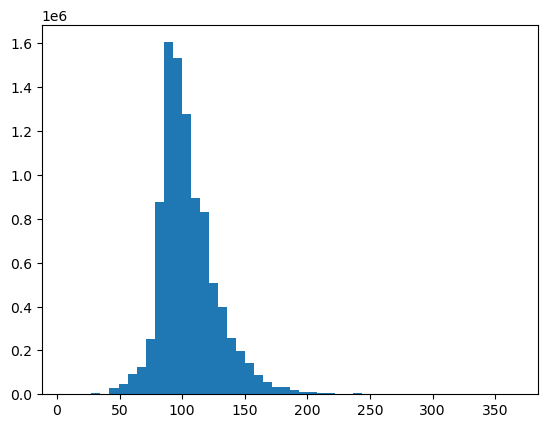

In [177]:
plt.hist(movies.runtimeMinutes[scores<10], bins=50)
plt.show()

We identify outliers by computing the z-score. The entries with a too high z-score are omitted (z>10). Using z-score assumes normal distribution of the variable. We can validate this hypothesis afterward with the ditribution plot. These omitted values represent less than 2% of the entries which isn't a big ratio. We replace these values with the median as this replacement method is less sensitive to the distribution and the remaining extreme values.

### `genres`

In [154]:
movies.genres.isna().sum()/movies.shape[0]

0.0017669118934463956

In [155]:
movies.loc[movies.genres.isna(), ['title', 'genres']].drop_duplicates()

,title,genres
169,The Infant at Snakeville,NaN
294,As You Like It,NaN
1328,A Venetian Night,NaN
1331,When the Earth Trembled,NaN
1332,When the Earth Trembled or the Power of Love,NaN
...,...,...
9505566,Music Hole,NaN
9513172,Zombie Universe 2,NaN
9516401,Little Wound's Warriors,NaN
9517284,Full Gas,NaN


In [161]:
movies.genres.value_counts().head(10)

Drama        2010563
Comedy       1344235
Action       1144121
Adventure     719117
Thriller      631590
Crime         589239
Romance       557348
Horror        528769
Sci-Fi        398194
Mystery       274014
Name: genres, dtype: int64

There are 2094 movies with missing genres. It represents less than 0.2% of the dataset. There isn't any simple way of giving a genre so we would prefer to remove these values. All the other entries are valid.

### `ordering`

In [121]:
movies.ordering.isna().sum()

0

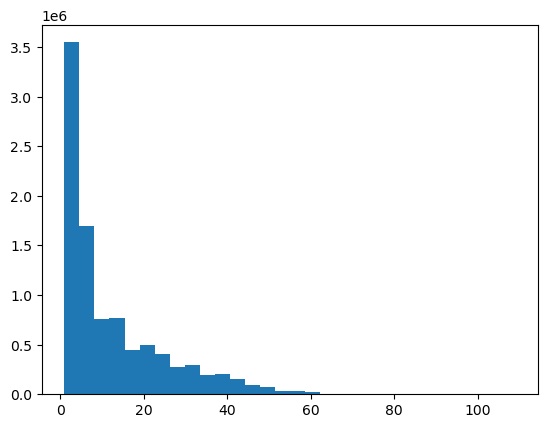

In [127]:
plt.hist(movies.ordering, bins = 30)
plt.show()

By looking at the distribution not any sample seems to be an outlier. There aren't any missing entries for this attribute.

### `region`

In [116]:
movies.region.value_counts()

US    9538110
Name: region, dtype: int64

Only one distinct value and there isn't any missing entries. This entry don't give any information. 

### `language`

In [119]:
movies.language.isna().sum()/movies.shape[0]

0.982686507075301

In [117]:
movies.language.value_counts()

en     139946
es      23443
yi       1317
haw       324
hi        108
Name: language, dtype: int64

With more than 98% of missing entries, this attribute can't be used.

### `types`

In [164]:
movies.types.isna().sum()/movies.shape[0]

0.15596192537095924

In [165]:
movies.types.value_counts()

imdbDisplay         6424056
working             1184412
alternative          256003
dvd                   69615
video                 64396
festival              28018
tv                    22624
original                450
videoworking           321
tvworking              232
tvvideo                176
festivalworking        147
dvdvideo                78
Name: types, dtype: int64

There are around 16% or entries missing for this attribute. There is a strong class imbalance in this attribute so it may be possible to replace by the mode imbdDisplay. As it adds bias to the dataset, it can be unappropriate to replace these values, we assume that the purpose of the further study won't be mainly focused on the types attribute. 

### `attributes`

In [129]:
movies.attributes.isna().sum()/movies.shape[0]

0.8848327394001537

With more than 88% percent of missing values this attribute can't be used for data mining. 

### `averageRating`

movies.averageRating.isna().sum()=0
movies.averageRating.min()=1.0
movies.averageRating.max()=10.0


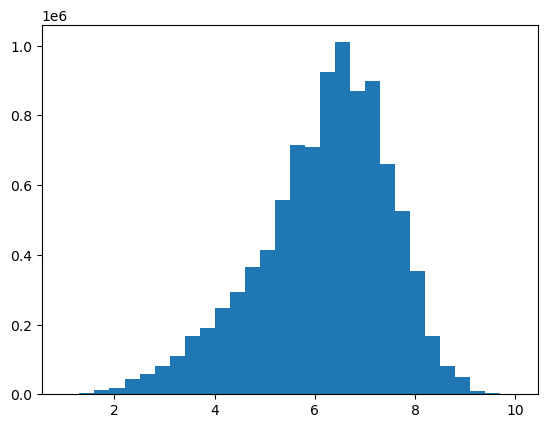

In [139]:
print(f'{movies.averageRating.isna().sum()=}')

print(f'{movies.averageRating.min()=}')
print(f'{movies.averageRating.max()=}')

plt.hist(movies.averageRating, bins=30)
plt.show()

Values of the attribute are in the right range [0-10]. With no missing values.

### `numVotes`

movies.numVotes.isna().sum()=0
movies.numVotes.min()=5
movies.numVotes.max()=2479369


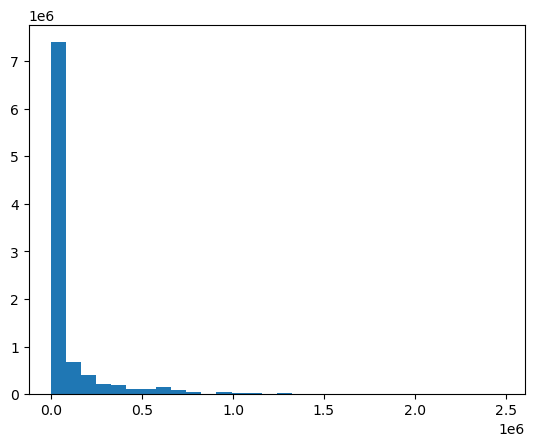

In [140]:
print(f'{movies.numVotes.isna().sum()=}')

print(f'{movies.numVotes.min()=}')
print(f'{movies.numVotes.max()=}')

plt.hist(movies.numVotes, bins=30)
plt.show()

In [143]:
movies.sort_values('numVotes', ascending=False)[['numVotes', 'title']].drop_duplicates().head(10)

,numVotes,title
2041726,2479369,Rita Hayworth and Shawshank Redemption
2041829,2479369,The Shawshank Redemption
4500208,2433653,The Dark Knight
4500199,2433653,The Dark Knight: The IMAX Experience
4500193,2433653,Rory's First Kiss
4500194,2433653,Batman: The Dark Knight
4500195,2433653,Untitled Batman Begins Sequel
4500196,2433653,Winter Green
4500198,2433653,Batman Begins 2
5923538,2183856,Inception: The IMAX Experience


The range of the attribute seems correct (only positive values and the one with the most votes are popular). No missing values.

# Replacement and column removal

In [188]:
out = movies.copy().drop(
        ['birthYear', 'deathYear', 'primaryTitle', 'originalTitle', 'isOriginalTitle', 'endYear', 'region', 'language', 'attributes'],
        axis=1
    )

In [189]:
out.loc[out.title == "The Money (1976)", 'startYear'] = 1976

out.loc[out.types.isna(), 'types'] = 'imbdDisplay'

out = out.dropna(axis=0, subset= ['startYear'])

out.loc[ np.abs(zscore(out.runtimeMinutes, nan_policy='omit')) >10, 'runtimeMinutes'] = np.nan
out.loc[out.runtimeMinutes.isna(), 'runtimeMinutes'] = np.nanquantile(out.runtimeMinutes.values, .5)

In [193]:
out.reset_index(drop=True, inplace=True)

In [197]:
out.head(5)

,tconst,nconst,primaryName,primaryProfession,titleType,isAdult,startYear,runtimeMinutes,genres,ordering,title,types,averageRating,numVotes
0,tt0000574,nm0143899,Godfrey Cass,actor,movie,0,1906.0,70.0,Action,6,The Story of the Kelly Gang,imdbDisplay,6.1,735
1,tt0000574,nm0143899,Godfrey Cass,actor,movie,0,1906.0,70.0,Adventure,6,The Story of the Kelly Gang,imdbDisplay,6.1,735
2,tt0000574,nm0143899,Godfrey Cass,actor,movie,0,1906.0,70.0,Biography,6,The Story of the Kelly Gang,imdbDisplay,6.1,735
3,tt0000574,nm0170118,Bella Cola,actress,movie,0,1906.0,70.0,Action,6,The Story of the Kelly Gang,imdbDisplay,6.1,735
4,tt0000574,nm0170118,Bella Cola,actress,movie,0,1906.0,70.0,Adventure,6,The Story of the Kelly Gang,imdbDisplay,6.1,735


# Normalization